Reading In All Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Reading in the Data

In [15]:
df = pd.read_csv("Tachycardia.txt", delimiter=" ")
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PERIOD
0,6238,2,250,46,121.0,81.0,0,28.73,0,0,95,76,1
1,6238,2,260,52,105.0,69.5,0,29.43,0,0,80,86,2
2,6238,2,237,58,108.0,66.0,0,28.50,0,0,80,71,3
3,11263,2,228,43,180.0,110.0,0,30.30,0,0,77,99,1
4,11263,2,230,49,177.0,102.0,0,31.36,0,1,120,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,9967157,1,239,64,117.0,81.0,0,24.86,0,0,75,82,2
5198,9967157,1,274,70,130.0,77.0,0,25.16,0,0,80,93,3
5199,9969773,2,260,50,190.0,130.0,0,43.67,1,0,85,260,1
5200,9969773,2,285,56,202.0,115.0,0,42.70,1,0,100,163,2


In [16]:
X = df.drop(['DIABETES', 'BPMEDS', 'PERIOD', 'RANDID', 'CURSMOKE'], axis = 1)
X
y = df['DIABETES']
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=307)

In [20]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97847809377402


Completing some Exploratory Analysis

<Axes: xlabel='Race', ylabel='BirthWeight'>

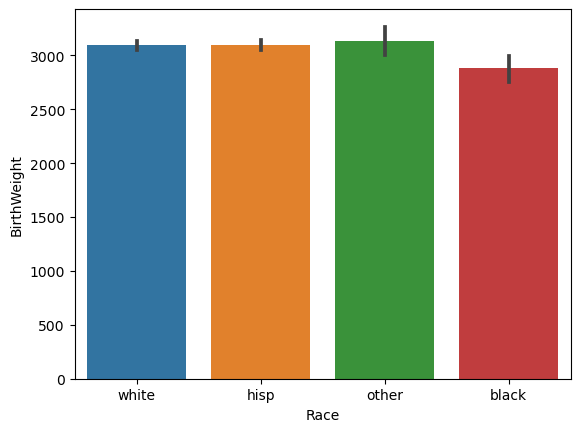

In [11]:
sns.barplot(x='Race', y='BirthWeight', data=df)

<Axes: xlabel='Race', ylabel='Mage'>

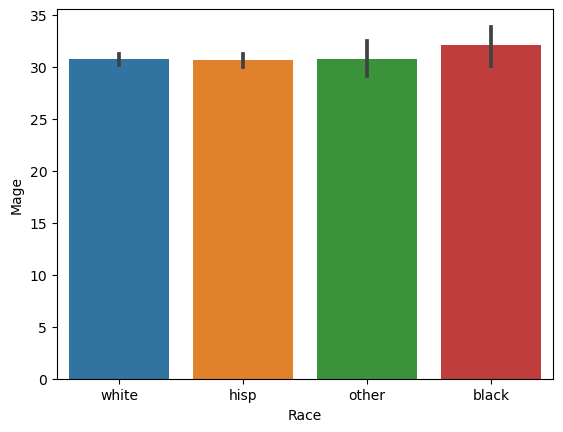

In [12]:
sns.barplot(x='Race', y='Mage', data=df)

<Axes: xlabel='Race', ylabel='Gage'>

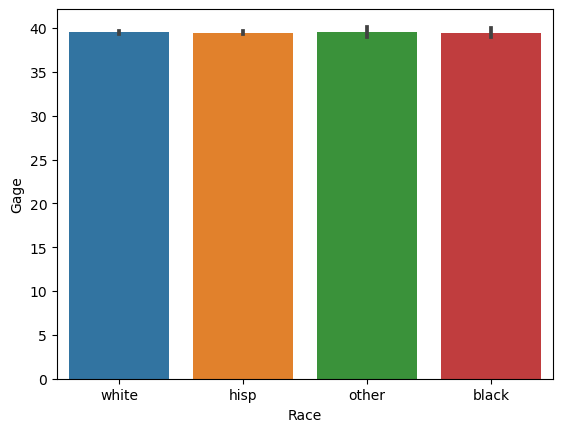

In [13]:
sns.barplot(x='Race', y='Gage', data=df)